Best Parameters: {'elastic__alpha': 0.1, 'elastic__l1_ratio': 0.8, 'poly__degree': 2}
Test R2 Score: 0.9466550607177341
Test MSE: 678.8700291652298


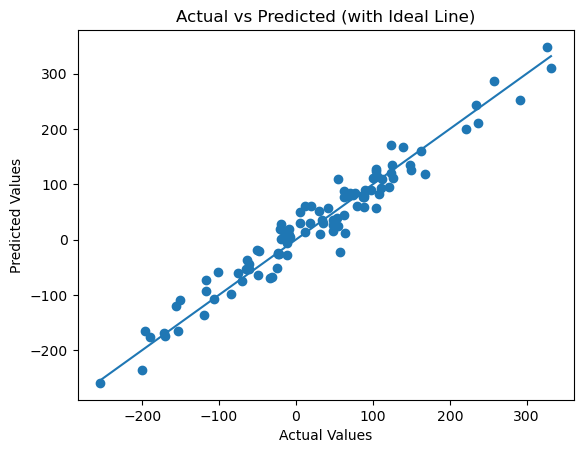

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

#Generate synthetic dataset
X, y = make_regression(n_samples=500, 
                       n_features=5, 
                       noise=25, 
                       random_state=42)

# Add non-linearity manually
y = y + 10 * (X[:, 0] ** 2)

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Create Pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures()),
    ("elastic", ElasticNet(max_iter=10000))
])

#Hyperparameter Grid
param_grid = {
    "poly__degree": [1, 2, 3],
    "elastic__alpha": [0.01, 0.1, 1, 10],
    "elastic__l1_ratio": [0.2, 0.5, 0.8]
}

#GridSearch with Cross Validation
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid.fit(X_train, y_train)

#Best Model
best_model = grid.best_estimator_

print("Best Parameters:", grid.best_params_)

# Predictions
y_pred = best_model.predict(X_test)

print("Test R2 Score:", r2_score(y_test, y_pred))
print("Test MSE:", mean_squared_error(y_test, y_pred))

plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)],
         [min(y_test), max(y_test)])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (with Ideal Line)")
plt.show()